<a href="https://colab.research.google.com/github/dudechego/My-ML-Projects/blob/main/Unsupervised%20Learning/Customer_Segmentation_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from google.colab import drive

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score

In [ ]:
#Connect to drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#Load Dataset
path = "/content/drive/MyDrive/datasets/Mall_Customers.csv"
df = pd.read_csv(path)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape

(200, 5)

In [ ]:
#Get our Features
df_analyze = df[["Annual Income (k$)", "Spending Score (1-100)"]]
df_analyze

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
df_filtered = df_analyze.values
#df_filtered

In [ ]:
#Test our KMEANS Model

wcss = []

for x in range(1, 12):
    kmeans = KMeans(n_clusters=x, init="k-means++")
    kmeans.fit(df_filtered)
    wcss.append(kmeans.inertia_)

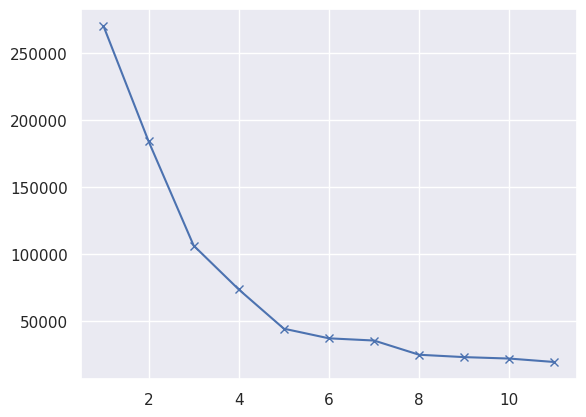

In [ ]:
#Plot the elbow method
sns.set()
plt.plot(range(1,12), wcss, marker="x")
plt.show()

In [ ]:
#So We Need 4 Clusters

kmeans_4 = KMeans(n_clusters=4,
init="k-means++")
y = kmeans_4.fit_predict(df_filtered)
labels = kmeans_4.labels_
centers = kmeans_4.cluster_centers_

In [ ]:

print(labels)
print(centers)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
[[87.         18.63157895]
 [86.53846154 82.12820513]
 [48.16831683 43.3960396 ]
 [25.72727273 79.36363636]]


In [ ]:
#Let's Add The Clusters to the Data
df_analyze["cluster"] = labels

/tmp/ipython-input-4252703864.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyze["cluster"] = labels


In [ ]:
df_analyze.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2


In [ ]:
#Get Silhouette_score and accuracy
acc = silhouette_score(df_filtered, y)
acc

np.float64(0.4937945814354117)

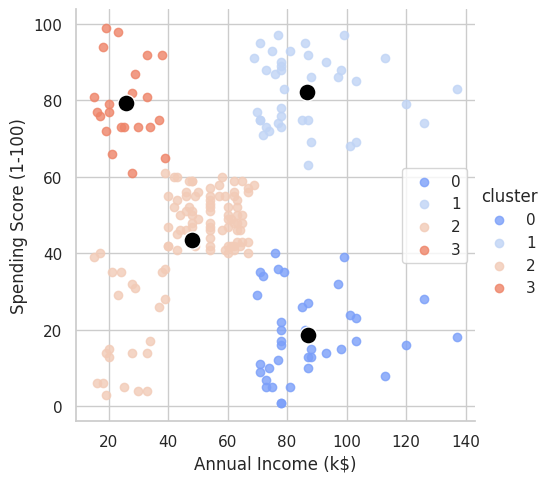

In [ ]:
#Let's Plot our Data

sns.set_style("whitegrid")
sns.lmplot(x="Annual Income (k$)",
y="Spending Score (1-100)", data=df_analyze,
aspect=1, hue="cluster", fit_reg=False, palette="coolwarm"
)
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], s=150, c="black")

plt.show()

In [ ]:
#Get a customers who belong to a certain cluster

for cluster in df_analyze["cluster"]:
    if cluster == 1:
        print("Hey Dear Customer Come Buy Our Latest Products!")

Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Products!
Hey Dear Customer Come Buy Our Latest Pr

In [ ]:
#Save Model's
saved = joblib.dump(kmeans_4, "customer_segmentation_chatgpt.joblib")

Let's Turn Our Model Into A StreamLit App

In [ ]:
pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 96.8 MB/s eta 0:00:00


In [ ]:
!npm install localtunnel

⠙⠹⠸⠼⠴⠦⠧⠇⠏
up to date, audited 23 packages in 1s
⠏
⠏3 packages are looking for funding
⠏  run `npm fund` for details
⠏
2 high severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.
⠏

In [ ]:
!pip install pyngrok

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
#Write our code
%%writefile app.py

import urllib
from pyngrok import ngrok
import subprocess
import streamlit as st
import joblib
import numpy as np


my_model = joblib.load("/content/customer_segmentation_chatgpt.joblib")

#Cluster Segmentation Function
def cluster_segment(input_data):
    data_as_array = np.asarray(input_data, dtype=float)

    #Reshape the array
    input_reshaped = data_as_array.reshape(1, -1)

    prediction = my_model.predict(input_reshaped)


    return f"You belong to cluster {prediction[0]}"


#Main Function
def main():
    #Giving a Title
    st.title("Customer Segmentation")

    #Input Data Fields
    income = st.text_input("Annual Income (k$)")
    score = st.text_input("Spending Score (1-100)")

    #Let's Predict
    cluster = ""

    #Predict Button
    if st.button("Get Cluster"):
        cluster = customer_segment([income, score])

    st.success(cluster)


if __name__ == "__main__":
    main()

Overwriting app.py


In [ ]:
import os
from pyngrok import ngrok

#Auth token verification
ngrok.set_auth_token("31EegdOBZkg31mSkHEssCa8ig1Z_2bFH1HqC2ifJGo5vb4Poy")

In [ ]:
#Kill Previous Terminals
ngrok.kill()

In [ ]:

import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 104.155.221.238


In [ ]:
!npx localtunnel --port 8501

⠙your url is: https://breezy-papers-itch.loca.lt
